In [34]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

file = "mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

In [ ]:
n_components = 9

#PCA
pca = PCA(n_components=n_components).fit(train_set, train_targets)

#LDA
lda = LDA(n_components=n_components).fit(train_set, train_targets)


n_components = 2
PCA Variance 0.16800588418808388
LDA Variance 0.4410385449022905


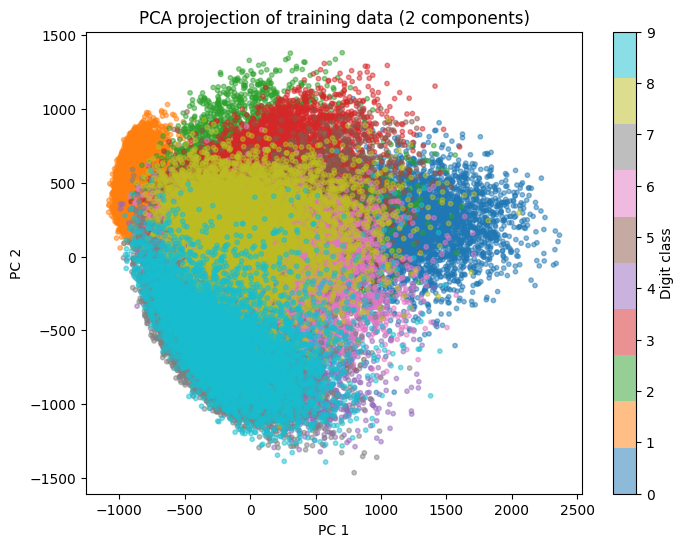

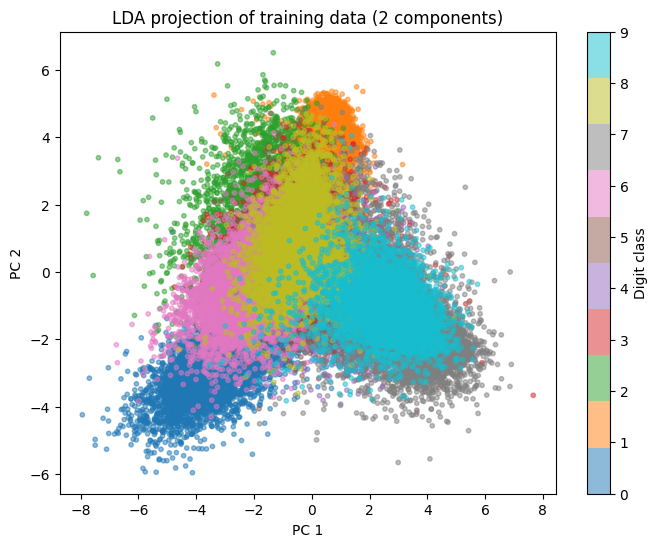

n_components = 9
PCA Variance 0.4645797980529532
LDA Variance 1.0000000000000002


TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Analyze proportion of Variance. If num_components=2 try to visualize dim. reduced data.
n_components = 2

#PCA
pca = PCA(n_components=n_components).fit(train_set, train_targets)

#LDA
lda = LDA(n_components=n_components).fit(train_set, train_targets)

print(f"n_components = {n_components}")
print(f"PCA Variance {sum(pca.explained_variance_ratio_)}")
print(f"LDA Variance {sum(lda.explained_variance_ratio_)}")

# Project the training data onto the first two principal components
train_pca = pca.transform(train_set)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_targets, cmap='tab10', alpha=0.5, s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA projection of training data (2 components)')
plt.colorbar(scatter, ticks=range(10), label='Digit class')
plt.show()

train_lda = lda.transform(train_set)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(train_lda[:, 0], train_lda[:, 1], c=train_targets, cmap='tab10', alpha=0.5, s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('LDA projection of training data (2 components)')
plt.colorbar(scatter, ticks=range(10), label='Digit class')
plt.show()

In [ ]:
# Estimate Gaussians from PCA/LDA
gmm = sklearn. (n_components=len(classes), covariance_type='full',).fit(reduced_data)

In [39]:
#Compute predictions


#Compute accuracy



In [40]:
#Compute the confusion matrices for PCA and LDA

#Plot Confusion matrices
